# Descriptive statistics using Polars or Panda
## IDS 706 Data Engineering Systems
 Author: Tianji Rao

## Contents:
#### [1.Introduction](#1-introduction)   
#### [2.Pandas](#2-pandas)

# 1. Introduction

## Import necessary packages

In [2]:
import pandas as pd
# import polars as pl
from lib import pd_desc, mean, median, std, pd_visual


Here, the author used the [`Eletric_Vehicle_Population_Data.csv`](https://catalog.data.gov/dataset/electric-vehicle-population-data) as the sample dataset and performed a series of descriptive statistics. Here we can have a glance at the dataset. All customized functions are from `lib`, which contains functions that can be used for statistical description and visualization.

In [3]:
# Using pandas to read .csv file
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
# print data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143596 non-null  object 
 1   County                                             143574 non-null  object 
 2   City                                               143574 non-null  object 
 3   State                                              143596 non-null  object 
 4   Postal Code                                        143574 non-null  float64
 5   Model Year                                         143596 non-null  int64  
 6   Make                                               143596 non-null  object 
 7   Model                                              143596 non-null  object 
 8   Electric Vehicle Type                              143596 non-null  object

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [5]:
df.shape

(143596, 17)

# 2. Pandas

Since importing data is shown in previous section, we already have a `pd.DataFrame` as our dataset. let's start from using `pandas` to do statistical descripition. Here, we gonna use `pd_desc` from `lib` to print a series of useful statistics.


## Descriptive Statistics
Here we can use the function `pd_desc` in `lib.py`, this function is based on `pd.DataFrame.describe()`. The code is:

```{python}
def pd_desc(df):
    return df.describe()
```

To focus on the mean, median, and standard deviation, we also have three other functions `mean()`, `median()`, and `std()`. Combining those three functions, we can get `summary_desc(df)`.


```{python}
def summary_desc(df):
    return [mean(df), median(df), std(df)]
```


In [6]:
# from lib import pd_desc, mean, median, std

check the cell below

In [7]:
#NBVAL_CHECK_OUTPUT
pd_desc(df)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,143574.000000,143596.000000,143596.000000,143596.000000,143269.000000,1.435960e+05,1.435740e+05
mean,98175.212824,2019.865574,70.495738,1373.386515,29.371748,2.092015e+08,5.297590e+10
std,2383.169088,3.016004,97.128735,9450.067747,14.823899,8.353700e+07,1.594040e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.668338e+08,5.303301e+10
50%,98122.000000,2021.000000,19.000000,0.000000,33.000000,2.111039e+08,5.303303e+10
75%,98370.000000,2022.000000,111.000000,0.000000,43.000000,2.364520e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [8]:
#NBVAL_CHECK_OUTPUT
mean(df['Electric Range'])

70.49573804284242

In [9]:
#NBVAL_CHECK_OUTPUT
median(df['Model Year'])

2021.0

In [10]:
#NBVAL_CHECK_OUTPUT
round(std(df['Electric Range']), 6)

97.128735

## Visualization

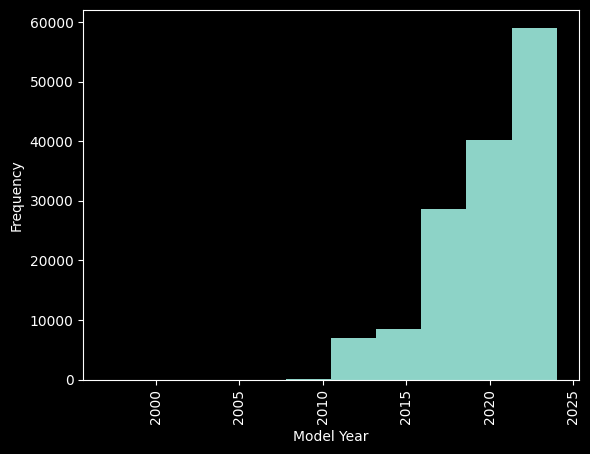

In [11]:
pd_visual(df['Model Year'])